# Mini-Project: Generative Models Discriminative Convolutional Image Classification 



In [ ]:
!pip install torch torchvision
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Introduction

Implementation of commonly used generative models:
1. A **Variational Autoencoder (VAE)**
2. A **Deep Convolutional Generative Adversarial Network (DCGAN)**

Implementation of CNN for Image Classification:
3. A **ResNet18**

## Part 1 
1. Implementation of a Variational Autoencoder on the MNIST dataset.

## Part 2 
2. Implementation of DCGAN on the CIFAR-10 dataset.

## Part 3
3. Implemenation of ResNet18 on the CIFAR-10 dataset.

# Part 1 - Variational Autoencoder



In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable

def show(img):
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

# device selection
GPU = True
device_idx = 0
if GPU:
    device = torch.device("cuda:" + str(device_idx) if torch.cuda.is_available() else "cpu")
else:
    device = torch.device("cpu")
print(device)

if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
torch.manual_seed(0)

if not os.path.exists('./CW_VAE/MNIST'):
    os.makedirs('./CW_VAE/MNIST')

cuda:0


## Hyper-parameter selection

In [ ]:
### Choice of the number of epochs, the learning rate and the batch size
num_epochs = 20
learning_rate  = 0.001  
batch_size = 100
### Choice of a value for the size of the latent space
latent_dim = 16

# Definition of any extra parameters
in_dim = 784
h_dim = 400
sig_z_x = 0.6
sig_x_z = 1.0
num_samples = 1
###

# Input transformation (None)
transform = transforms.Compose([transforms.ToTensor(),])

# Output transformation for visualizing images (TODO)
denorm = lambda x:x

## Data loading


In [ ]:
train_dat = datasets.MNIST(
    "data/", train=True, download=True, transform=transform
)
test_dat = datasets.MNIST("data/", train=False, transform=transform)

loader_train = DataLoader(train_dat, batch_size, shuffle=True)
loader_test = DataLoader(test_dat, batch_size, shuffle=False)

sample_inputs, _ = next(iter(loader_test))
fixed_input = sample_inputs[:32, :, :, :]

save_image(fixed_input, './CW_VAE/MNIST/image_original.png')

## Model Definition

In [ ]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        # Encoder:
        # in_dim is 784 for 784 pixels
        self.fc1 = nn.Linear(in_dim, h_dim)
        # mean layer
        self.fc21 = nn.Linear(h_dim, latent_dim)
        # log variance layer
        self.fc22 = nn.Linear(h_dim, latent_dim)
        self.relu = nn.ReLU()
        # Decoder:
        self.fc3 = nn.Linear(latent_dim, h_dim)
        self.fc4 = nn.Linear(h_dim, in_dim)
        
    def encode(self, x):
        # Hidden Layer
        hidden1 = self.relu(self.fc1(x))
        # Encoding mean
        mu = self.fc21(hidden1)
        # Encoding log variance
        logvar = self.fc22(hidden1)
        return mu, logvar
    
    def reparametrize(self, mu, logvar, n_samples):
        epsilon = torch.randn(n_samples,latent_dim).to(device)
        return epsilon * torch.exp(0.5 * logvar) + mu
        
    def decode(self, z):
        # Hidden Layer
        hidden3 = self.relu(self.fc3(z))
        # Activation
        mu_x_z = torch.sigmoid(self.fc4(hidden3))
        return mu_x_z 

    def forward(self, x):
        # Encode x
        mu_z_x, logvar_z_x = self.encode(x)
        # Reparameterise z
        z_reparam = self.reparametrize(mu_z_x, logvar_z_x, mu_z_x.size()[0])
        # Decode z
        mu_x_z = self.decode(z_reparam) 
        return mu_x_z, mu_z_x, logvar_z_x

model = VAE().to(device)
params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))
print(model)
# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Total number of parameters is: 648016
VAE(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc21): Linear(in_features=400, out_features=16, bias=True)
  (fc22): Linear(in_features=400, out_features=16, bias=True)
  (relu): ReLU()
  (fc3): Linear(in_features=16, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=784, bias=True)
)


In [ ]:
# TODO
class Conv_VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        # TODO: Architecture

    def encode(self, x):
        # Hidden Layer
        # TODO
        # Encoding mean
        mu = 
        # Encoding log variance
        logvar = 
        return mu, logvar
    
    def reparametrize(self, mu, logvar, n_samples):
        epsilon = torch.randn(n_samples,latent_dim).to(device)
        return epsilon * torch.exp(0.5 * logvar) + mu
        
    def decode(self, z):
        # Hidden Layer
        hidden3 = 
        # Activation
        mu_x_z = 
        return mu_x_z

    def forward(self, x):
        # Encode x
        mu_z_x, logvar_z_x = self.encode(x)
        # Reparameterise z
        z_reparam = self.reparametrize(mu_z_x, logvar_z_x, mu_z_x.size()[0])
        # Decode z
        mu_x_z = self.decode(z_reparam) 
        return mu_x_z, mu_z_x, logvar_z_x

model = VAE().to(device)
params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))
print(model)
# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Training loop

In [ ]:
def loss_function_VAE(mu_x_z, mu_z_x, logvar_z_x, img):
    # Log-likelihood loss: BCE
    BCE = F.binary_cross_entropy(mu_x_z, img, reduction = 'sum')

    # KL Divergence
    KL = -0.5 * torch.sum(1 + logvar_z_x - mu_z_x.pow(2) - torch.exp(logvar_z_x))
    beta = 1.0
    KL = beta * KL

    return torch.mean(BCE), torch.mean(KL), torch.mean(BCE + KL)

train_loss_log = []
exp_loss_log = []
kl_loss_log = []

model.train()
for epoch in range(num_epochs):     
    train_loss = 0
    exp_loss = 0
    kl_loss = 0
    for batch_idx, data in enumerate(loader_train):
        img, _ = data
        img = img.view(img.size()[0], -1)
        img = img.to(device)
        # Zero gradients
        optimizer.zero_grad()
        # Forward pass
        mu_x_z, mu_z_x, logvar_z_x = model(img)
        E, KL, loss = loss_function_VAE(mu_x_z, mu_z_x, logvar_z_x, img)
        # Backward
        loss.backward()
        exp_loss += E.item()
        exp_loss_log.append(E.item())
        kl_loss += KL.item()
        kl_loss_log.append(KL.item())
        train_loss += loss.item()
        train_loss_log.append(loss.item())
        optimizer.step()
    # Print losses and save reconstructions for each epoch
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, train_loss / len(loader_train.dataset)) + '\n')
    print('Loss Components: ' + '\n')
    print('epoch [{}/{}], exp_loss:{:.4f}'.format(epoch + 1, num_epochs, exp_loss / len(loader_train.dataset)) + '\n')
    print('epoch [{}/{}], kl_loss:{:.4f}'.format(epoch + 1, num_epochs, kl_loss / len(loader_train.dataset)))
    recon,_,_ = model(fixed_input.view(fixed_input.size(0), -1).to(device))
    recon = denorm(recon.cpu())
    save_image(recon, './reconstructed_epoch_{}.png'.format(epoch))

# save the model 
torch.save(model.state_dict(), './CW_VAE/MNIST/VAE_model6.pth')

epoch [1/20], loss:157.5103

Loss Components: 

epoch [1/20], exp_loss:141.7713

epoch [1/20], kl_loss:15.7390
epoch [2/20], loss:119.3141

Loss Components: 

epoch [2/20], exp_loss:98.0941

epoch [2/20], kl_loss:21.2200
epoch [3/20], loss:113.8778

Loss Components: 

epoch [3/20], exp_loss:91.7019

epoch [3/20], kl_loss:22.1759
epoch [4/20], loss:111.3364

Loss Components: 

epoch [4/20], exp_loss:88.7667

epoch [4/20], kl_loss:22.5697
epoch [5/20], loss:109.8165

Loss Components: 

epoch [5/20], exp_loss:86.9828

epoch [5/20], kl_loss:22.8337
epoch [6/20], loss:108.7302

Loss Components: 

epoch [6/20], exp_loss:85.7762

epoch [6/20], kl_loss:22.9540
epoch [7/20], loss:107.9908

Loss Components: 

epoch [7/20], exp_loss:84.8610

epoch [7/20], kl_loss:23.1298
epoch [8/20], loss:107.4214

Loss Components: 

epoch [8/20], exp_loss:84.1915

epoch [8/20], kl_loss:23.2299
epoch [9/20], loss:106.8853

Loss Components: 

epoch [9/20], exp_loss:83.5992

epoch [9/20], kl_loss:23.2861
epoch [10

In [ ]:
# Experiments with Beta value:
def loss_function_VAE(mu_x_z, mu_z_x, logvar_z_x, img, beta):
    # BCE
    BCE = F.binary_cross_entropy(mu_x_z, img, reduction = 'sum')

    # KL
    KL = -0.5 * torch.sum(1 + logvar_z_x - mu_z_x.pow(2) - torch.exp(logvar_z_x))
    KL = beta * KL

    return torch.mean(BCE), torch.mean(KL), torch.mean(BCE + KL)

train_loss_logs = []
for beta in np.arange(0.001, 1.25, 0.25):
    model = VAE().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # Train each model
    model.train()
    train_loss_log = []
    exp_loss_log = []
    kl_loss_log = []
    for epoch in range(num_epochs):     
        train_loss = 0
        exp_loss = 0
        kl_loss = 0
        for batch_idx, data in enumerate(loader_train):
            img, _ = data
            img = img.view(img.size()[0], -1)
            img = img.to(device)
            # Zero gradients
            optimizer.zero_grad()
            # Forward pass
            mu_x_z, mu_z_x, logvar_z_x = model(img)
            E, KL, loss = loss_function_VAE(mu_x_z, mu_z_x, logvar_z_x, img, beta)
            # Backward
            loss.backward()
            exp_loss += E.item()
            exp_loss_log.append(E.item())
            kl_loss += KL.item()
            kl_loss_log.append(KL.item())
            train_loss += loss.item()
            train_loss_log.append(loss.item())
            optimizer.step()

    train_loss_logs.append(train_loss_log)

    # Print final losses:
    print('Beta = %s' % beta)
    print()
    print('Training Loss: ' + str(train_loss_log[-1]))
    print('Log Likelihood Loss: ' + str(exp_loss_log[-1]))
    print('KL Loss: ' + str(kl_loss_log[-1]))
    print()

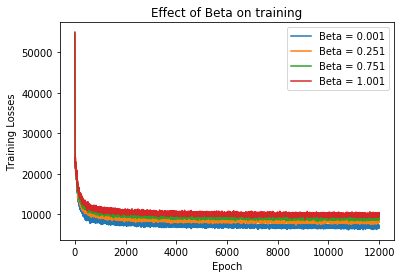

In [ ]:
# Plot Training Losses for different Beta values
plt.plot(np.arange(len(np.array(train_loss_logs[0]))), np.array(train_loss_logs[0]), label='Beta = 0.001')
plt.plot(np.arange(len(np.array(train_loss_logs[1]))), np.array(train_loss_logs[1]), label='Beta = 0.251')
plt.plot(np.arange(len(np.array(train_loss_logs[2]))), np.array(train_loss_logs[2]), label='Beta = 0.751')
plt.plot(np.arange(len(np.array(train_loss_logs[3]))), np.array(train_loss_logs[3]), label='Beta = 1.001')
plt.legend(loc='upper right')
plt.title('Effect of Beta on training')
plt.xlabel('Epoch')
plt.ylabel('Training Losses')
plt.show()

### Discussion:

VAEs are trained by maximising the variational lower bound, which consists of two terms: 
•	The log-likelihood of the data, x, given the latent variable, z
•	The KL Divergence of the variational posterior from the prior over the latent variable. 

Since the prior over latent variables is a standard Gaussian, and the variational posterior is chosen to be a multivariate Gaussian, the KL Divergence has a closed form. 

The log-likelihood loss depends on the choice of distribution of data $p(x|z)$. I have assumed that the distribution of the data is approximately a multivariate Bernoulli distribution. The MNIST pixels have intensities in the range $[0,1]$, and the model predicts outputs in the same range using the sigmoid activation in the decoder. However, most of the pixel values in each image are closer to either $1$ or $0$. This makes the ‘ground truth’ intensity values approximately binary, and so I chose to use the binary cross-entropy loss. This encourages the model to learn to generate pixel intensity values that are also close to $1$ or $0$. This allows for the generated images to looks visually similar to the original images both in terms of visual structure and pixel brightness.

Finally, the hyperparameter, $\beta$, was experimented with, and the training losses are plotted for values in the range $[0,1]$. There is not much of an effect on the training losses apart from the obvious that increasing this parameter increases the total training loss. A larger $\beta$ value ensures that the training error is not so low that the model can only reconstruct the training data, by more strongly weighting the KL loss term. This encourages the variance of the variational posterior to increase, which maximises the negative KL loss (minimises the KL loss) in order to place more probability mass on many $z$ values that could generate $x$, rather than collapsing to a single estimate of the most likely value (which is more likely to be the case if $\beta = 0$.


## Plotting, Analysis and Visualisation



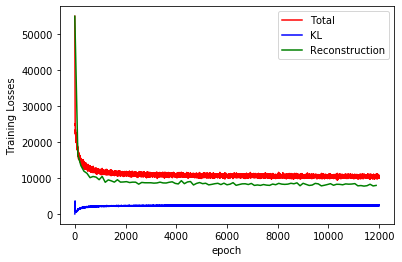

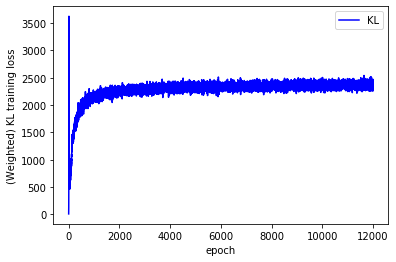

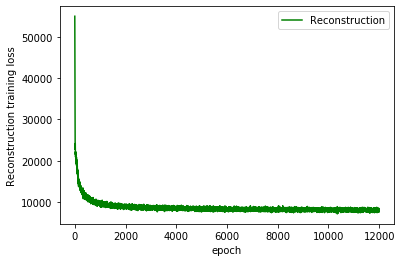

In [ ]:
# Plotting
# Total Loss
plt.plot(np.arange(12000), np.array(train_loss_log), c='r', label='Total')
plt.plot(np.arange(12000), np.array(kl_loss_log), c='b', label='KL')
plt.plot(np.arange(0,12000,120), np.array(exp_loss_log)[::120], c='g', label='Reconstruction')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Training Losses')
plt.show()

# KL Loss
plt.plot(np.arange(12000), np.array(kl_loss_log), c='b', label='KL')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('(Weighted) KL training loss')
plt.show()

# Reconstruction Loss
plt.plot(np.arange(12000), np.array(exp_loss_log), c='g', label='Reconstruction')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Reconstruction training loss')
plt.show()

100


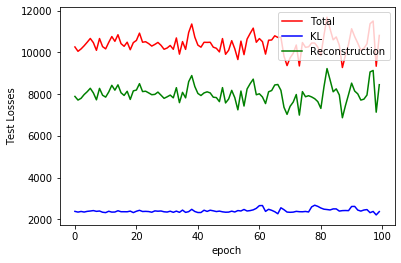

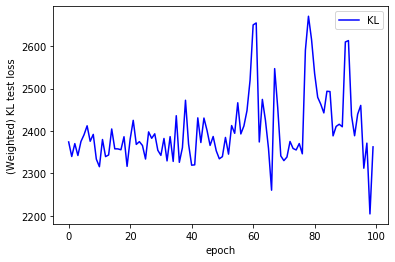

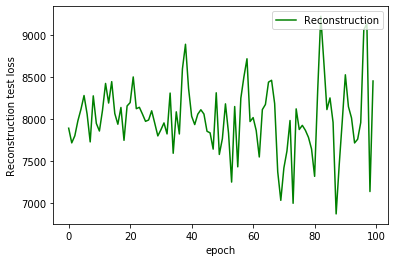

In [ ]:
# Testing and Ploting
# Load the model
model.load_state_dict(torch.load('./CW_VAE/MNIST/VAE_model5.pth'))
model.eval()
test_loss_log = []
test_exp_loss_log = []
test_kl_loss_log = []
test_exp_loss = 0
test_kl_loss = 0
test_loss = 0
print(len(loader_test))
with torch.no_grad():
    for batch_idx, data in enumerate(loader_test):
        img, _ = data
        img = img.view(img.size()[0], -1)
        img = img.to(device)
        # Forward pass
        mu_x_z, mu_z_x, logvar_z_x = model(img)
        E, KL, loss = loss_function_VAE(mu_x_z, mu_z_x, logvar_z_x, img)
        test_exp_loss += E.item()
        test_exp_loss_log.append(E.item())
        test_kl_loss += KL.item()
        test_kl_loss_log.append(KL.item())
        test_loss += loss.item()
        test_loss_log.append(loss.item())

# Total Loss
plt.plot(np.arange(100), np.array(test_loss_log), c='r', label='Total')
plt.plot(np.arange(100), np.array(test_kl_loss_log), c='b', label='KL')
plt.plot(np.arange(100), np.array(test_exp_loss_log), c='g', label='Reconstruction')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Test Losses')
plt.show()

# KL Loss
plt.plot(np.arange(100), np.array(test_kl_loss_log), c='b', label='KL')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('(Weighted) KL test loss')
plt.show()

# Reconstruction Loss
plt.plot(np.arange(100), np.array(test_exp_loss_log), c='g', label='Reconstruction')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Reconstruction test loss')
plt.show()

### Dicussion:

•	The total training loss decreases over the course of training, as desired. In particular, the shape of the total training loss follows the reconstruction loss closely. 

•	The reconstruction loss decreases over the course of training, rapidly at the start and then converges very quickly. This is good because it means the encoder quickly learns the input-to-latent-space mapping. 

•	The total training loss is higher than the reconstruction error throughout training except at the very start, which is desired as it means the decoder doesn’t just learn to replicate the training inputs exactly. This is due to the contribution from the KL divergence loss, which increases over the course of training. 

•	The KLD loss increases rapidly at the start of training because it has only seen a few datapoints so the probability mass of the variational posterior is concentrated to a small areas in the latent space. This is vastly different from the prior over the latent space, leading to a high KLD loss. Over the course of training, the variational posterior is encouraged to become more similar to the prior, spreading its mass over a larger domain in the latent space. This causes the KLD to increase only asymptotically for the majority of the rest of the duration of training. 





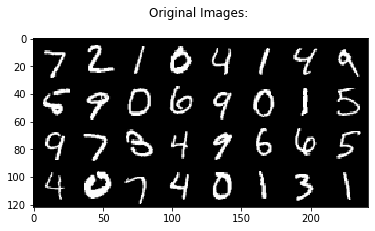

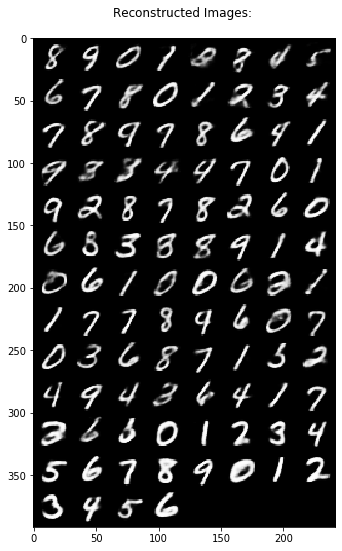

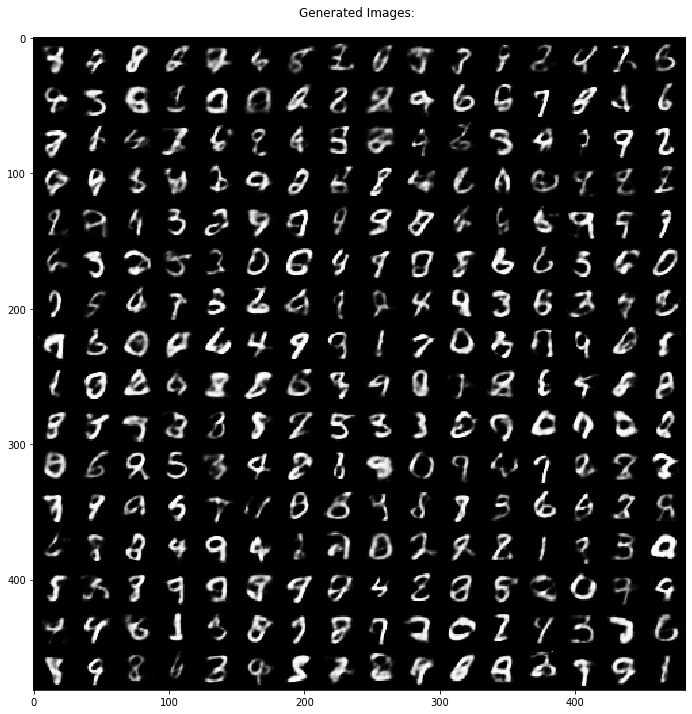

In [ ]:
# Visualisation

# Load the model
model.load_state_dict(torch.load('./CW_VAE/MNIST/VAE_model5.pth'))
sample_inputs, _ = next(iter(loader_test))
fixed_input = sample_inputs[0:32, :, :, :]

# Visualize the original images of the last batch of the test set
img = make_grid(denorm(fixed_input), nrow=8, padding=2, normalize=False,
                range=None, scale_each=False, pad_value=0)
plt.figure()
plt.title('Original Images: \n')
show(img)

with torch.no_grad():
    # Visualize the reconstructed images of the last batch of test set
    
    model.eval()
    for i, (img, _) in enumerate(loader_test):
        img = img.view(img.size(0), -1)
        img = img.to(device)
        if i == 99:
            mu_x_z,mu_z_x,logvar_z_x = model(img)
    recon_batch = mu_x_z.view(mu_x_z.size()[0], 1, 28, 28)
    
    recon_batch = recon_batch.cpu()
    recon_batch = make_grid(denorm(recon_batch), nrow=8, padding=2, normalize=False,
                            range=None, scale_each=False, pad_value=0)
    plt.figure(figsize=(9,9))
    plt.title('Reconstructed Images: \n')
    show(recon_batch)
    
model.eval()
n_samples = 256
z = torch.randn(n_samples,latent_dim).to(device)
with torch.no_grad():
    # Generate images
    samples = model.decode(z)
    samples = samples.view(n_samples, 1, 28, 28)
    
    samples = samples.cpu()
    samples = make_grid(denorm(samples), nrow=16, padding=2, normalize=False,
                            range=None, scale_each=False, pad_value=0)
    plt.figure(figsize = (12,12))
    plt.title('Generated Images: \n')
    show(samples)

### Qualitative analysis of the learned representations


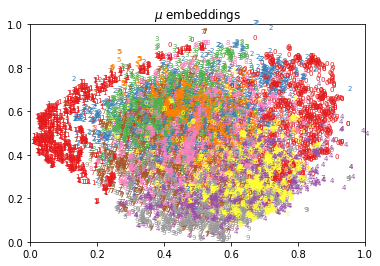

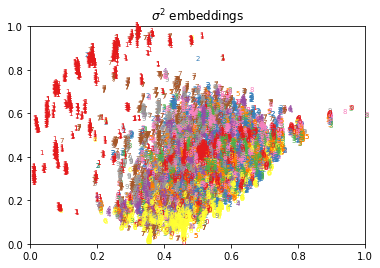

In [ ]:
from sklearn.manifold import TSNE

test_dat_targets = test_dat.targets.numpy()
test_dat_data = test_dat.data.float().view(-1,784).to(device)

# Get latent representations of test set:
with torch.no_grad():
    mu, logvar = model.encode(test_dat_data)

# TSNE
tsne = TSNE(n_components=2, init='pca')
mu_tsne = tsne.fit_transform(mu.cpu())
logvar_tsne = tsne.fit_transform(logvar.cpu())

# Plotting function
def plot_tsne(data, label, title):
    data = (data - np.min(data, 0)) / (np.max(data, 0) - np.min(data, 0))
    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i].item()), color=plt.cm.Set1(label[i].item() / 10.),fontdict={'size': 7})
    plt.title(title)
    return fig

fig = plot_tsne(mu_tsne, test_dat_targets, '$\mu$ embeddings')
fig = plot_tsne(logvar_tsne, test_dat_targets, '$\sigma^{2}$ embeddings')

### Discussion:

In the 2-dimensional visualisation, it looks like the model has learnt a good general representation as the T-SNE plot for $\mu$ parameter of the latent space shows identifiable clusters. Some of the clusters overlap, such as for digits 2 (blue) and 3 (green), highlighting that they have learnt similar latent representations. This could be due to the similar curvature at the top of the digits. This is also the case for some of the 4’s (purple) and 9’s (grey). This is due to the ‘loop’ structure at the top of the digit, and a ‘tail’ structure at the bottom of the digit. Some people write 4’s without the closed loop at the top. These versions of the digit 4 are ‘further’ away from the main space occupied by the 9’s and 4’s. 

The plot for the $\sigma^2$ parameter shows the spread latent structure representing each digit. The datapoints in the test set for the $\sigma^2$ parameter are concentrated in a smaller region of the 2D embedded space, as opposed to the embeddings for $\mu$ which occupy a larger space. This intuitively makes sense as the variation between classes is more important/prominent in the $\mu$ embedded space represents, while the variation within classes is more important/prominent in the $\sigma^2$ embedded space. You would expect each digit of the same class to exhibit little variation between them, while each digit’s $\mu$ parameter can vary a lot from each other. This is true for the majority of the digits, except digit 1 which seems to have the most ‘spread’ across the embedded latent space for $\sigma^2$. 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


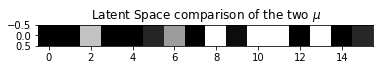

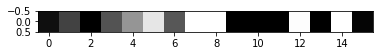

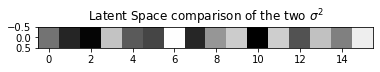

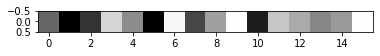

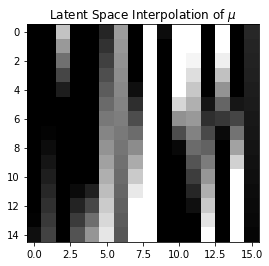

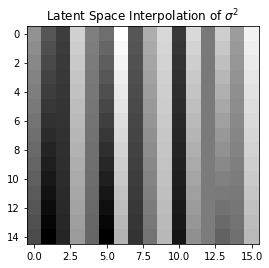

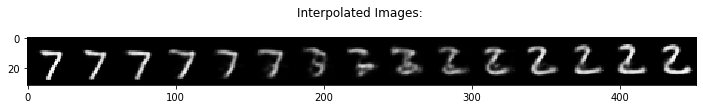

In [ ]:
# Visualisation of Latent Representations using PCA
model.load_state_dict(torch.load('./CW_VAE/MNIST/VAE_model5.pth'))
test_input1 = sample_inputs[0, :, :, :].view(1,-1).to(device)
test_input2 = sample_inputs[1, :, :, :].view(1,-1).to(device)
with torch.no_grad():
    mu1, logvar1 = model.encode(test_input1)
    mu2, logvar2 = model.encode(test_input2)

# Linear Interpolation
def interpolate(z1, z2, num=15):
    Z = np.zeros((num, z1.shape[1]))
    for i in range(z1.shape[1]):
        Z[:, i] = np.linspace(z1[0,i], z2[0,i], num)
    return Z

mu_interp = torch.from_numpy(interpolate(mu1.cpu(), mu2.cpu())).to(device).float()
logvar_interp = torch.from_numpy(interpolate(logvar1.cpu(), logvar2.cpu())).to(device).float()

# Latent space representation of the two digits before interpolation
plt.figure()
plt.title('Latent Space comparison of the two $\mu$')
mu1 = make_grid(mu1, nrow=1, padding=2, normalize=False, range=None, scale_each=False, pad_value=0)
show(mu1)
plt.figure()
mu2 = make_grid(mu2, nrow=1, padding=2, normalize=False, range=None, scale_each=False, pad_value=0)
show(mu2)
plt.figure()
plt.title('Latent Space comparison of the two $\sigma^2$')
logvar1 = make_grid(logvar1, nrow=1, padding=2, normalize=True, range=None, scale_each=False, pad_value=0)
show(logvar1)
plt.figure()
logvar2 = make_grid(logvar2, nrow=1, padding=2, normalize=True, range=None, scale_each=False, pad_value=0)
show(logvar2)

# Latent space representation of the two digits showing transition via interpolation
latent_mu = make_grid(mu_interp, nrow=15, padding=2, normalize=False, range=None, scale_each=False, pad_value=0)
plt.figure()
plt.title('Latent Space Interpolation of $\mu$')
show(latent_mu)
latent_logvar = make_grid(logvar_interp, nrow=1, padding=2, normalize=True, range=None, scale_each=False, pad_value=0)
plt.figure()
plt.title('Latent Space Interpolation of $\sigma^2$')
show(latent_logvar)

n_samples = 15
z = torch.randn(n_samples,latent_dim).to(device)
z_reparam = model.reparametrize(mu_interp, logvar_interp, n_samples)
samples = model.decode(z_reparam)
samples = samples.view(n_samples, 1, 28, 28).detach()
samples = make_grid(denorm(samples), nrow=15, padding=2, normalize=False, range=None, scale_each=False, pad_value=0)
plt.figure(figsize = (12,12))
plt.title('Interpolated Images: \n')
show(samples)

### Discussion:

In the transition from one digit to another, the some activations for $\mu$ hardly change, while the majority of the activations have a large contrast between the two digits, and so the transitions are much more obvious. As for $\sigma^2$, the two latent space representations for the digits 7 and 2 are a lot more similar each other than the $\mu$ vectors, in terms of the magnitude of the activations at each of the 16 neurons. The $\sigma^2$ vectors can be interpreted as showing how the digits vary among themselves, where if certain activation values are high, this represents variations in a specific geometrical feature of the given digit. As such, differences in these vectors show that different digits are likely to vary via different geometrical features. This visualisation was done for different pairs of digits, but 7 and 2 are shown in the notebook. For these digits, most values in the $\sigma^2$ vector are similar, perhaps highlighting that the variations between different 2’s are attributed to similar geometrical features are the variations between different 7’s. This makes sense because the shape of a 7 and a 2 are almost the same, except that 2 has an extra horizontal line at the bottom, without which it would look more like a 7. Finally, a visualisation of the transition between the reconstructed 7 and 2 is shown. 

## Part 2 - Deep Convolutional GAN

Trained a DCGAN (https://arxiv.org/abs/1511.06434) on the CIFAR-10 dataset. Experimented with different architectures, tricks for stability in training (such as using different activation functions, batch normalization, different values for the hyper-parameters, etc.)

### Part 2.1 

Implementation of the DCGAN Architecture

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms, models
from torchvision.utils import save_image, make_grid
import torch.nn.functional as F
import matplotlib.pyplot as plt


def denorm(x, channels=None, w=None ,h=None, resize = False):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    if resize:
        if channels is None or w is None or h is None:
            print('Number of channels, width and height must be provided for resize.')
        x = x.view(x.size(0), channels, w, h)
    return x

def show(img):
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

# device selection
GPU = True
device_idx = 0
if GPU:
    device = torch.device("cuda:" + str(device_idx) if torch.cuda.is_available() else "cpu")
else:
    device = torch.device("cpu")
print(device)

# We set a random seed to ensure that your results are reproducible.
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
torch.manual_seed(0)

if not os.path.exists('./CW_DCGAN'):
    os.makedirs('./CW_DCGAN')

cuda:0


### Data loading

In [ ]:
batch_size = 256  # tune
NUM_TRAIN = 49000

transform = transforms.Compose([
     transforms.ToTensor(),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])


data_dir = './datasets'

cifar10_train = datasets.CIFAR10(data_dir, train=True, download=True,
                             transform=transform)
cifar10_val = datasets.CIFAR10(data_dir, train=True, download=True,
                           transform=transform)
cifar10_test = datasets.CIFAR10(data_dir, train=False, download=True, 
                            transform=transform)

loader_train = DataLoader(cifar10_train, batch_size=batch_size, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
loader_val = DataLoader(cifar10_val, batch_size=batch_size, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)))
loader_test = DataLoader(cifar10_test, batch_size=batch_size)


Extracting ./datasets/cifar-10-python.tar.gz to ./datasets
Files already downloaded and verified
Files already downloaded and verified


### Hyper-parameter selection

In [ ]:
### Choice of the number of epochs, the learning rate and the size of the Generator's input noise vector.
num_epochs = 20
learning_rate  = 0.0002#
latent_vector_size = 100

# Definition of other hyperparameters used.
leaky_slope = 0.2
num_input_channels = 3
sample, _ = cifar10_train[0]
img_size = sample.shape[-1]

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.conv_t1 = nn.ConvTranspose2d(in_channels = latent_vector_size, out_channels = img_size * 16, kernel_size=4, stride=1, padding=0, bias = False)
        self.bn1 = nn.BatchNorm2d(img_size * 16)
        self.conv_t2 = nn.ConvTranspose2d(in_channels = img_size * 16, out_channels = img_size * 8, kernel_size=4, stride=2, padding=1, bias = False)
        self.bn2 = nn.BatchNorm2d(img_size * 8)
        self.conv_t3 = nn.ConvTranspose2d(in_channels = img_size * 8, out_channels = img_size * 4, kernel_size=4, stride=2, padding=1, bias = False)
        self.bn3 = nn.BatchNorm2d(img_size * 4)
        self.conv_t4 = nn.ConvTranspose2d(in_channels = img_size * 4, out_channels = num_input_channels, kernel_size=4, stride=2, padding=1, bias = False)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def decode(self, z):
        x = self.bn1(self.conv_t1(z))
        x = self.relu(x)
        x = self.bn2(self.conv_t2(x))
        x = self.relu(x)
        x = self.bn3(self.conv_t3(x))
        x = self.relu(x)
        x = self.conv_t4(x)
        x = self.tanh(x)

        return x

    def forward(self, z):
        return self.decode(z)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = num_input_channels, out_channels = img_size * 4, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(in_channels = img_size * 4, out_channels = img_size * 8, kernel_size=4, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(img_size * 8)
        self.conv3 = nn.Conv2d(in_channels = img_size * 8, out_channels = img_size * 16, kernel_size=4, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(img_size * 16)
        self.conv4 = nn.Conv2d(in_channels = img_size * 16, out_channels = 1, kernel_size=4, stride=1, padding=0)
        self.leaky_relu = nn.LeakyReLU(negative_slope = leaky_slope)
        self.sigmoid = nn.Sigmoid()
        
    def discriminator(self, x):
        out = self.leaky_relu(self.conv1(x))
        out = self.bn2(self.conv2(out))
        out = self.leaky_relu(out)
        out = self.bn3(self.conv3(out))
        out = self.leaky_relu(out)
        out = self.conv4(out)
        out = self.sigmoid(out)

        return out

    def forward(self, x):
        out = self.discriminator(x)
        return out.view(-1, 1).squeeze(1)

In [ ]:
###################### Residual Blocks #######################
class RBlockConvTranspose(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        super(RBlockConvTranspose, self).__init__() 
        
        self.left = nn.Sequential(nn.ConvTranspose2d(outchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(), 
                                  nn.ConvTranspose2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel)) 
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            
            self.shortcut = nn.Sequential(nn.ConvTranspose2d(outchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
            
    def forward(self, x): 
        out = self.left(x) 
        out += self.shortcut(x) 
        out = F.relu(out)
        
        return out

class Generator(nn.Module):
    def __init__(self, RBlockConvTranspose):
        super(Generator, self).__init__()
        self.inchannel = img_size * 16
        self.conv_t1 = nn.ConvTranspose2d(in_channels = latent_vector_size, out_channels = img_size * 16, kernel_size=4, stride=1, padding=0, bias = False)
        self.bn1 = nn.BatchNorm2d(img_size * 16)
        self.conv_t2 = nn.ConvTranspose2d(in_channels = img_size * 16, out_channels = img_size * 8, kernel_size=4, stride=2, padding=1, bias = False)
        self.bn2 = nn.BatchNorm2d(img_size * 8)
        self.conv_t3 = nn.ConvTranspose2d(in_channels = img_size * 8, out_channels = img_size * 4, kernel_size=4, stride=2, padding=1, bias = False)
        self.bn3 = nn.BatchNorm2d(img_size * 4)
        self.conv_t4 = nn.ConvTranspose2d(in_channels = img_size * 4, out_channels = num_input_channels, kernel_size=4, stride=2, padding=1, bias = False)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.layer1 = self.make_layer(RBlockConvTranspose, img_size * 16, 1, 1)
        self.layer2 = self.make_layer(RBlockConvTranspose, img_size * 8, 1, 1)
        self.layer3 = self.make_layer(RBlockConvTranspose, img_size * 4, 1, 1)

    def make_layer(self, block, channels, num_blocks, stride):
        
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            
        return nn.Sequential(*layers)
    
    def decode(self, z):
        x = self.bn1(self.conv_t1(z))
        x = self.relu(x)
        x = self.layer1(x)
        self.inchannel = img_size * 8
        x = self.bn2(self.conv_t2(x))
        x = self.relu(x)
        x = self.layer2(x)
        self.inchannel = img_size * 4
        x = self.bn3(self.conv_t3(x))
        x = self.relu(x)
        x = self.layer3(x)
        x = self.conv_t4(x)
        x = self.tanh(x)
        return x

    def forward(self, z):
        return self.decode(z)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = num_input_channels, out_channels = img_size * 4, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(in_channels = img_size * 4, out_channels = img_size * 8, kernel_size=4, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(img_size * 8)
        self.conv3 = nn.Conv2d(in_channels = img_size * 8, out_channels = img_size * 16, kernel_size=4, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(img_size * 16)
        self.conv4 = nn.Conv2d(in_channels = img_size * 16, out_channels = 1, kernel_size=4, stride=1, padding=0)
        self.leaky_relu = nn.LeakyReLU(negative_slope = leaky_slope)
        self.sigmoid = nn.Sigmoid()
        
    def discriminator(self, x):
        out = self.leaky_relu(self.conv1(x))
        out = self.bn2(self.conv2(out))
        out = self.leaky_relu(out)
        out = self.bn3(self.conv3(out))
        out = self.leaky_relu(out)
        out = self.conv4(out)
        out = self.sigmoid(out)

        return out

    def forward(self, x):
        out = self.discriminator(x)
        return out.view(-1, 1).squeeze(1)

### Initialisation of Model and printing number of parameters

In [ ]:
# Custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [ ]:
# DCGAN Residual 
use_weights_init = False

model_G = Generator(RBlockConvTranspose).to(device)
if use_weights_init:
    model_G.apply(weights_init)
params_G = sum(p.numel() for p in model_G.parameters() if p.requires_grad)
print("Total number of parameters in Generator is: {}".format(params_G))
print(model_G)
print('\n')

model_D = Discriminator().to(device)
if use_weights_init:
    model_G.apply(weights_init)
params_D = sum(p.numel() for p in model_D.parameters() if p.requires_grad)
print("Total number of parameters in Discriminator is: {}".format(params_D))
print(model_D)
print('\n')

print("Total number of parameters is: {}".format(params_G + params_D))

Total number of parameters in Generator is: 9728000
Generator(
  (conv_t1): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_t2): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_t3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_t4): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (relu): ReLU()
  (tanh): Tanh()
  (layer1): Sequential(
    (0): RBlockConvTranspose(
      (left): Sequential(
        (0): ConvTranspose2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine

In [ ]:
# DCGAN
use_weights_init = True

model_G = Generator().to(device)
if use_weights_init:
    model_G.apply(weights_init)
params_G = sum(p.numel() for p in model_G.parameters() if p.requires_grad)
print("Total number of parameters in Generator is: {}".format(params_G))
print(model_G)
print('\n')

model_D = Discriminator().to(device)
if use_weights_init:
    model_D.apply(weights_init)
params_D = sum(p.numel() for p in model_D.parameters() if p.requires_grad)
print("Total number of parameters in Discriminator is: {}".format(params_D))
print(model_D)
print('\n')

print("Total number of parameters is: {}".format(params_G + params_D))

Total number of parameters in Generator is: 3448576
Generator(
  (conv_t1): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_t2): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_t3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_t4): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (relu): ReLU()
  (tanh): Tanh()
)


Total number of parameters in Discriminator is: 2638209
Discriminator(
  (conv1): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn2): Bat

### Loss function

In [ ]:
criterion = nn.BCELoss(reduction='mean')
def loss_function(out, label):
    loss = criterion(out, label)
    return loss

### Initialisation of optimizers

In [ ]:
# Setup Optimizer
beta1 = 0.5
optimizerD = torch.optim.Adam(model_D.parameters(), lr=learning_rate, betas=(beta1, 0.999))
optimizerG = torch.optim.Adam(model_G.parameters(), lr=learning_rate, betas=(beta1, 0.999))

### Definition of fixed input vectors to monitor training and mode collapse.

In [ ]:
fixed_noise = torch.randn(batch_size, latent_vector_size, 1, 1, device=device)
real_label = 1
fake_label = 0

### Model Tuning: Validation

In [ ]:
val_losses_G = []
val_losses_D = []
val_losses_G_epoch = []
val_losses_D_epoch = []
for epoch in range(num_epochs):
    for i, data in enumerate(loader_val, 0):
        val_loss_D = 0
        val_loss_G = 0
        
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################device
        # train with real
        model_D.zero_grad()
        real_cpu = data[0].to(device)
        batch_size = real_cpu.size(0)
        label = torch.full((batch_size,), real_label, device=device)

        output = model_D(real_cpu)
        errD_real = loss_function(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        # train with fake
        noise = torch.randn(batch_size, latent_vector_size, 1, 1, device=device)
        fake = model_G(noise)
        label.fill_(fake_label)
        output = model_D(fake.detach())
        errD_fake = loss_function(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        val_loss_D += errD.item()
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        model_G.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        output = model_D(fake)
        errG = loss_function(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        val_loss_G += errG.item()
        optimizerG.step()

        val_losses_D.append(val_loss_D / len(loader_val))
        val_losses_G.append(val_loss_G / len(loader_val))

        print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
              % (epoch, num_epochs, i, len(loader_val),
                 errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))


### Train

In [ ]:
train_losses_G = []
train_losses_D = []
train_losses_G_epoch = []
train_losses_D_epoch = []
for epoch in range(num_epochs):
    for i, data in enumerate(loader_train, 0):
        train_loss_D = 0
        train_loss_G = 0
        
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################device
        # train with real
        model_D.zero_grad()
        real_cpu = data[0].to(device)
        batch_size = real_cpu.size(0)
        label = torch.full((batch_size,), real_label, device=device)

        output = model_D(real_cpu)
        errD_real = loss_function(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        # train with fake
        noise = torch.randn(batch_size, latent_vector_size, 1, 1, device=device)
        fake = model_G(noise)
        label.fill_(fake_label)
        output = model_D(fake.detach())
        errD_fake = loss_function(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        train_loss_D += errD.item()
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        model_G.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        output = model_D(fake)
        errG = loss_function(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        train_loss_G += errG.item()
        optimizerG.step()

        train_losses_D.append(train_loss_D / len(loader_train))
        train_losses_G.append(train_loss_G / len(loader_train))

        print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
              % (epoch, num_epochs, i, len(loader_train),
                 errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

    if epoch == 0:
        save_image(denorm(real_cpu.cpu()).float(), './CW_DCGAN/real_samples.png')
    
    fake = model_G(fixed_noise)
    save_image(denorm(fake.cpu()).float(), './CW_DCGAN/fake_samples_epoch_%03d.png' % epoch)
    train_losses_D_epoch.append(train_loss_D / len(loader_train))
    train_losses_G_epoch.append(train_loss_G / len(loader_train))
    
# save losses and models
torch.save(model_G.state_dict(), './CW_DCGAN/DCGAN_model_G.pth')
torch.save(model_D.state_dict(), './CW_DCGAN/DCGAN_model_D.pth')

[0/20][0/192] Loss_D: 1.6484 Loss_G: 6.8103 D(x): 0.4848 D(G(z)): 0.4845 / 0.0018
[0/20][1/192] Loss_D: 1.2822 Loss_G: 5.7033 D(x): 0.5621 D(G(z)): 0.3790 / 0.0048
[0/20][2/192] Loss_D: 1.3310 Loss_G: 8.5183 D(x): 0.6960 D(G(z)): 0.5276 / 0.0003
[0/20][3/192] Loss_D: 1.4420 Loss_G: 3.0364 D(x): 0.3693 D(G(z)): 0.0572 / 0.0686
[0/20][4/192] Loss_D: 3.1781 Loss_G: 7.9906 D(x): 0.9245 D(G(z)): 0.9285 / 0.0005
[0/20][5/192] Loss_D: 0.5100 Loss_G: 8.1524 D(x): 0.7111 D(G(z)): 0.0872 / 0.0004
[0/20][6/192] Loss_D: 0.5085 Loss_G: 6.4411 D(x): 0.7613 D(G(z)): 0.1593 / 0.0023
[0/20][7/192] Loss_D: 1.1024 Loss_G: 11.0959 D(x): 0.8447 D(G(z)): 0.5364 / 0.0000
[0/20][8/192] Loss_D: 0.5894 Loss_G: 9.5737 D(x): 0.6298 D(G(z)): 0.0036 / 0.0001
[0/20][9/192] Loss_D: 0.2489 Loss_G: 5.3699 D(x): 0.8334 D(G(z)): 0.0444 / 0.0066
[0/20][10/192] Loss_D: 1.4854 Loss_G: 14.1831 D(x): 0.9516 D(G(z)): 0.7252 / 0.0000
[0/20][11/192] Loss_D: 0.2489 Loss_G: 15.2751 D(x): 0.8055 D(G(z)): 0.0001 / 0.0000
[0/20][12/1

# DISCUSSION OF ARCHITECTURE SELECTION *

##Training Stability:

In order to make training more stable, I experimented with: bottleneck layers, batch normalisation and different activation functions. Although slightly faster, training convergence and stability was not greatly improved by the bottleneck layers, and so these were excluded in the final model for simplicity.

###•	Batch normalisation:

Although weight initialisation was used, batch normalisation further helped to stabilise training by ensuring the average variance in the output activations at each layer were controlled from growing or diminishing too much. These layers also helped with gradient flows during training and helped to ensure that mode collapse did not occur early on in training. Once mode collapse happens, the discriminator will encourage the generator to escape the mode it is currently in, not by improving the generative distribution, but by simply forcing it to find and collapse on another mode. Normalising outputs after each layer discourages the generator from relying on generating a small group of similar images in order to minimise the loss. Not normalising the after each layer would skew the model to generate images it just so happened to learn to generate early on.  

Batch normalisation was not applied to the generator output or the discriminator input. These particular locations can be seen as the interaction boundary between the two networks. It is important not to normalise at the point where information flows between the two networks as this can slow down, or even reset, training, in which oscillations in the loss curves can occur. Since there is no direct parameterised connection between the generator and discriminator, there is no memory of what kind of information the discriminator should expect from the generator during their interaction/information exchange. This is why the discriminator should receive the generator outputs in its ‘raw’ unnormalised form. 

###•	Activation functions:

As suggested in the paper, I started by using ReLUs in the generator, except at its output where I used the Tanh function, and leaky ReLUs for the discriminator. I experimented with parametric ReLUs, without improvement to the original suggestions. 


##Architecture Experiments:

•	I experimented with max pooling, average pooling and learned pooling via strided convolution to downsample/summarise responses for a subsequent layer. I found that the generated images seemed more realistic when using strided convolution because the layers were able to learn weights to summarise the responses over local neighbourhoods in the images as opposed to imposing a much stronger prior (like max or averaging) over the summary operation. 

•	I considered two ways to implement the learned pooling: a convolution layer with stride = 1 (feature learning) follow by a convolution layer with a stride greater than 1 (summary/pooling operation learning), or simply a convolution layer with stride greater than one (both feature learning and downsampling/pooling). 

o	I found that implementing learned pooling with two separate layers performed better when the stride was around the same size as the kernel (3 or 4). This meant that the next layer required fewer inputs to process due to a larger degree of downsampling, but also meant more parameters. 

o	The joint implementation meant that the learned weights in this layer were responsible for both feature learning and pooling and so had to share their capacity across both requirements, while the two-layer implementation divided these requirements across two separate weight kernels, allowing for more confident (higher stride) downsampling. As a result, the joint implementation used lower stride (=2) to ensure it did not confidently miss important features. Both implementations had comparable results except that the latter required fewer parameters overall with only a slight increase in forward pass operations. 

•	Depth: Using the validation set, I experimented with 2-layer, 4-layer, 8-layer and 32-layer Generators and Discriminators and found that although the 32-layer model generated realistic images (without the resdidual blocks) it took a longer time to train, while the 4-layer model generated images that were of comparable quality. In the end, the simplest model that achieved a good performance was chosen. Future experiments could involve ResNet or U-Net type architectures with much deeper layers and computational resources. 
•	Batch size: If I did not use the Batch Norm layers, I would have used a smaller batch size, but increased the batch size to ensure a smoother normalisation between each layer. 


•	Kernel size: This hyperparameter was tuned alongside depth, because of their effect on the receptive field of the output. When experimenting with shallower networks, the kernel size was chosen to be larger to ensure the receptive field was maintained to represent the entire input. For deeper networks, I ensured the kernel size was small enough to keep the hidden receptive field small (i.e. the receptive field of the current layer to the previous layer). I calculated these using the following formulae:

$n_{out} = \frac{n_{in} + 2p - k}{s} + 1$

$j_{out} = j_{in} * s$

$r_{out} = r_{in} + (k-1) * j_{in}$

$start_{out} = start_{in} + (\frac{k-1}{2} - p) * j_{in}$


### Generator samples

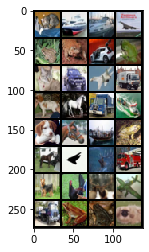

In [ ]:
it = iter(loader_test)
sample_inputs, _ = next(it)
fixed_input = sample_inputs[0:32, :, :, :]

# Visualize the original images of the last batch of the test set
img = make_grid(denorm(fixed_input), nrow=4, padding=2, normalize=False,
                range=None, scale_each=False, pad_value=0)
show(img)

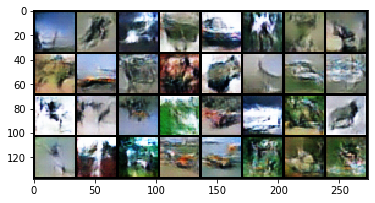

In [ ]:
# Load the model
model_G = Generator().to(device)
model_G.load_state_dict(torch.load('./CW_DCGAN/DCGAN_model_G.pth'))
input_noise = torch.randn(batch_size, latent_vector_size, 1, 1, device=device)

with torch.no_grad():
    # Visualize the generated images
    generated = model_G(input_noise).cpu()
    generated = make_grid(denorm(generated)[:32], nrow=8, padding=2, normalize=False, 
                        range=None, scale_each=False, pad_value=0)
    show(generated)

### Part 2.2

### Train losses curves


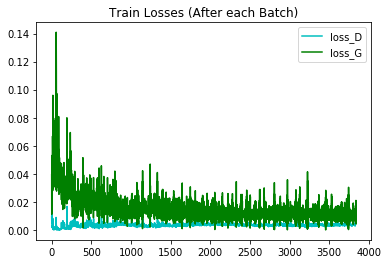

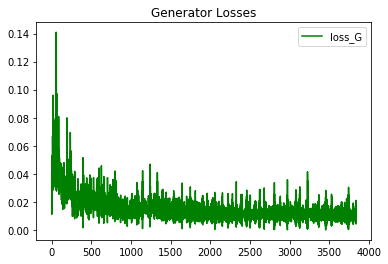

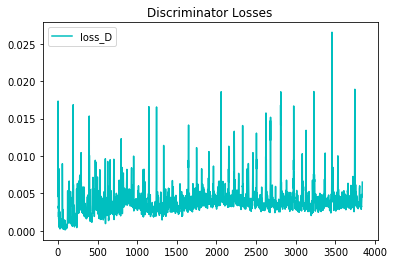

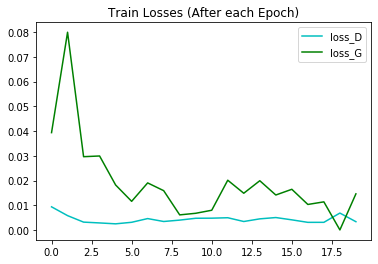

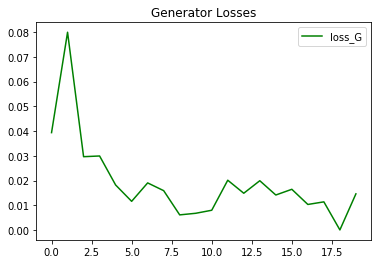

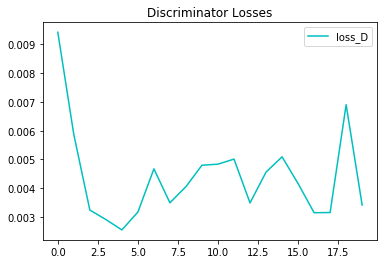

In [ ]:
import matplotlib.pyplot as plt
# Training Losses for each batch
plt.plot(list(range(0, np.array(train_losses_D).shape[0])), np.array(train_losses_D), label='loss_D', color='c')
plt.plot(list(range(0, np.array(train_losses_G).shape[0])), np.array(train_losses_G), label='loss_G', color='g')
plt.legend()
plt.title('Train Losses (After each Batch)')
plt.show()

plt.plot(list(range(0, np.array(train_losses_G).shape[0])), np.array(train_losses_G), label='loss_G', color='g')
plt.legend()
plt.title('Generator Losses')
plt.show()

plt.plot(list(range(0, np.array(train_losses_D).shape[0])), np.array(train_losses_D), label='loss_D', color='c')
plt.legend()
plt.title('Discriminator Losses')
plt.show()

# Training Losses after each epoch
plt.plot(list(range(20)), np.array(train_losses_D)[::192], label='loss_D', color='c')
plt.plot(list(range(20)), np.array(train_losses_G)[::192], label='loss_G', color='g')
plt.legend()
plt.title('Train Losses (After each Epoch)')
plt.show()

plt.plot(list(range(20)), np.array(train_losses_G)[::192], label='loss_G', color='g')
plt.legend()
plt.title('Generator Losses')
plt.show()

plt.plot(list(range(20)), np.array(train_losses_D)[::192], label='loss_D', color='c')
plt.legend()
plt.title('Discriminator Losses')
plt.show()

### Discussion about Loss Curves

The loss curves above are theoretically sensible as the generator loss decreases over training, meaning it gets better at generating samples that are similar to samples from the true data-generating distribution (i.e. the training data). Additionally, the discriminator loss gradually rises over training, as expected. This means it is getting worse at being able to distinguish between the real and fake (generated) images.

### Discussion about Mode Collapse

During experimentation, mode collapse did occur in which there was little variety in the generated images. Mode collapse also occurred in the colour space of the images, where most of the generated images would either only have various shades of green, or only certain combinations of colours would appear in images. This was initially because the chosen size of the latent space was too small to represent the complexity of the images in the training data. After some tuning, a large enough latent space was required to introduce sufficient variety into the generated images. 


The images generated by the best model have not collapsed, at least not in a way that is obvious from visual inspection. In order to further diagnose mode collapse, one would have to observe erratic jumps in the generator training loss, which would indicate ‘moving’ between different modes after every few updates to the generator, rather than a stable, smoother loss curve. As shown by the loss curves for the generator, it is does not periodically jump up and down, so is stable over the various modes (there are no oscillations). 


## Part 3 - ResNet18

In [ ]:
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Set random seeds
np.random.seed(0)
torch.manual_seed(1)

Define ResNet

In [ ]:
# Final Tuned ResNet

# (Manual hyperparameter tuning done within these classes)

class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        
        super(ResidualBlock, self).__init__() 
        
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.PReLU(), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel)) 
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
            
    def forward(self, x): 
        
        out = self.left(x) 
        out += self.shortcut(x) 
        out = F.leaky_relu(out)
        
        return out

# define resnet

class ResNet(nn.Module):
    
    def __init__(self, ResidualBlock, num_classes = 10):
        
        super(ResNet, self).__init__()
        
        self.inchannel = 64
        self.conv1 = nn.Sequential(Conv2d(3, 64, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(64), 
                                  nn.PReLU())

        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride = 1)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
        self.maxpool = MaxPool2d(4)
        self.fc = nn.Linear(512, num_classes)
    
    def make_layer(self, block, channels, num_blocks, stride):
        
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            self.inchannel = channels
            
        return nn.Sequential(*layers)
    
    def forward(self, x):
        
        x = self.conv1(x)

        x = self.layer1(x)
        ####
        #x = F.dropout(x, p=0.6, training=self.training)
        ####
        x = self.layer2(x)
        ####
        #x = F.dropout(x, p=0.4, training=self.training)
        ####
        x = self.layer3(x)
        ####
        #x = F.dropout(x, p=0.4, training=self.training)
        ####
        x = self.layer4(x)
        
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        
        return x
    
def ResNet18():
    return ResNet(ResidualBlock)

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np

import torchvision.transforms as T

In [ ]:
# Train and Test Data Loading (Run after Validation/Hyperparamater Tuning)
data_dir = './data'

# Download Data
train_dat = dset.CIFAR10(data_dir, train=True, download=True, transform=transform_train)
test_dat = dset.CIFAR10(data_dir, train=False, transform=transform_test)

# Create Dataloaders
loader_train = DataLoader(train_dat, batch_size=64, shuffle=True)
loader_test = DataLoader(test_dat, batch_size=64, shuffle=False)

In [ ]:
# Optimising Data Augmentation 
data_dir = './data'
# Random Affine and Random Crop
affine_vals = list(np.arange(0.05, 0.20, 0.05))
crop_vals = list(np.arange(30, 40, 5))
for i in affine_vals:
    for j in crop_vals:
        print('Affine: ' + str(i))
        print()
        print('Crop: ' + str(j))
        # Data Augmentation transform for during training
        transform_train = T.Compose([T.RandomAffine(degrees=0, translate=(i, i), scale=None, shear=None, resample=False, fillcolor=0),
                                  T.RandomCrop(j, padding=4),
                                  T.ToTensor(), 
                                  T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

        # Transform images to tensor and normalise for test data
        transform_test = T.Compose([T.ToTensor(), 
                              T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

        # Transform images to tensor and normalise for validation data
        transform_val = T.Compose([T.ToTensor(), 
                              T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

        # Validation Dataset loading
        # Download Data
        train_dat = dset.CIFAR10(data_dir, train=True, download=True, transform=transform_train)
        val_dat = dset.CIFAR10(data_dir, train=True, download=True, transform=transform_val)
        test_dat = dset.CIFAR10(data_dir, train=False, transform=transform_test)

        # Validation set for hyperparameter tuning
        indices = list(range(len(train_dat)))
        split = int(np.floor(0.9*len(train_dat)))

        np.random.shuffle(indices)

        val_idx, train_idx = indices[split:], indices[:split]
        sampler_v = SubsetRandomSampler(val_idx)
        sampler_t = SubsetRandomSampler(train_idx)

        # Create Dataloaders for Optimisation
        loader_train = DataLoader(train_dat, batch_size=64, sampler=sampler_t)
        loader_val = DataLoader(val_dat, batch_size=64, sampler=sampler_v)

        print_every = 100

        # define and train the network
        model = ResNet18()
        optimizer = optim.Adam(model.parameters())
        train_part(model, optimizer, epochs = 10)

        # report validation set accuracy
        check_accuracy(loader_val, model)

In [ ]:
# ResNet Dropout Regularisation Optimisation
dropout_input = list(np.arange(0.5, 0.8, 0.1))
dropout_hidden = list(np.arange(0.2, 0.5, 0.1))
for i in dropout_input:
    for j in dropout_hidden:
        # define resnet

        class ResNet(nn.Module):
            
            def __init__(self, ResidualBlock, num_classes = 10):
                
                super(ResNet, self).__init__()
                
                self.inchannel = 64
                self.conv1 = nn.Sequential(Conv2d(3, 64, kernel_size = 3, stride = 1,
                                                    padding = 1, bias = False), 
                                          nn.BatchNorm2d(64), 
                                          nn.PReLU())

                self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride = 1)
                self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
                self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
                self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
                self.maxpool = MaxPool2d(4)
                self.fc = nn.Linear(512, num_classes)
            
            def make_layer(self, block, channels, num_blocks, stride):
                
                strides = [stride] + [1] * (num_blocks - 1)
                layers = []
                
                for stride in strides:
                    layers.append(block(self.inchannel, channels, stride))
                    self.inchannel = channels
                    
                return nn.Sequential(*layers)
            
            def forward(self, x):
                
                x = self.conv1(x)

                x = self.layer1(x)
                ####
                x = F.dropout(x, p=i, training=self.training)
                ####
                x = self.layer2(x)
                ####
                x = F.dropout(x, p=j, training=self.training)
                ####
                x = self.layer3(x)
                ####
                x = F.dropout(x, p=j, training=self.training)
                ####
                x = self.layer4(x)
                
                x = self.maxpool(x)
                x = x.view(x.size(0), -1)
                x = self.fc(x)
                
                return x
            
        def ResNet18():
            return ResNet(ResidualBlock)

        # Data Augmentation transform for during training
        data_dir = './data'

        transform_train = T.Compose([T.RandomAffine(degrees=0, translate=(0.05, 0.05), scale=None, shear=None, resample=False, fillcolor=0),
                                  T.RandomCrop(30, padding=4),
                                  T.ToTensor(), 
                                  T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

        # Transform images to tensor and normalise for test data
        transform_test = T.Compose([T.ToTensor(), 
                              T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

        # Transform images to tensor and normalise for validation data
        transform_val = T.Compose([T.ToTensor(), 
                              T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

        # Validation Dataset loading
        # Download Data
        train_dat = dset.CIFAR10(data_dir, train=True, download=True, transform=transform_train)
        val_dat = dset.CIFAR10(data_dir, train=True, download=True, transform=transform_val)
        test_dat = dset.CIFAR10(data_dir, train=False, transform=transform_test)

        # Validation set for hyperparameter tuning
        indices = list(range(len(train_dat)))
        split = int(np.floor(0.9*len(train_dat)))

        np.random.shuffle(indices)

        val_idx, train_idx = indices[split:], indices[:split]
        sampler_v = SubsetRandomSampler(val_idx)
        sampler_t = SubsetRandomSampler(train_idx)

        # Create Dataloaders for Optimisation
        loader_train = DataLoader(train_dat, batch_size=64, sampler=sampler_t)
        loader_val = DataLoader(val_dat, batch_size=64, sampler=sampler_v)

        print_every = 100

        # Define and train the network
        model = ResNet18()
        optimizer = optim.Adam(model.parameters())
        train_part(model, optimizer, epochs = 10)

        # Report validation set accuracy
        check_accuracy(loader_val, model)

Training Loop

In [ ]:
def train_part(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # Move the model parameters to CPU/GPU
    validation_losses = []
    training_losses = []
    for e in range(epochs):
        print(len(loader_train))
        training_loss = []
        for t, (x, y) in enumerate(loader_train):
            model.train()  # Put model to training mode
            x = x.to(device=device, dtype=dtype)  # Move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            if t % print_every == 0:
                # Add loss to training losses
                training_losses.append(loss.item())
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
                print()

        # Store validation losses
        model.eval()
        with torch.no_grad():
            for t, (x, y) in enumerate(loader_val):
                x = x.to(device=device, dtype=dtype)  # Move to device
                y = y.to(device=device, dtype=torch.long)
                scores = model(x)
                loss = F.cross_entropy(scores, y)

                if t % 10 == 0:
                    # Add loss to training losses
                    validation_losses.append(loss.item())
                    print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
                    print()

    print(len(validation_losses))
    plt.figure()
    x = np.arange(80)
    x_val = np.arange(80)
    y = np.array(training_losses)
    y_val = np.array(validation_losses)
    plt.plot(x,y)
    plt.plot(x_val, y_val)
    plt.show()

In [ ]:
# Define and train the network
model = ResNet18()
optimizer = optim.Adam(model.parameters())
train_part(model, optimizer, epochs = 10)

# Report test set accuracy
check_accuracy(loader_test, model)

# Save the model
torch.save(model.state_dict(), 'conv.pt')

Epoch: 0, Iteration 0, loss = 2.7813

Epoch: 0, Iteration 100, loss = 1.9861

Epoch: 0, Iteration 200, loss = 1.6974

Epoch: 0, Iteration 300, loss = 1.4864

Epoch: 0, Iteration 400, loss = 1.5394

Epoch: 0, Iteration 500, loss = 1.3894

Epoch: 0, Iteration 600, loss = 1.0114

Epoch: 0, Iteration 700, loss = 1.1373

Epoch: 1, Iteration 0, loss = 1.2131

Epoch: 1, Iteration 100, loss = 1.4361

Epoch: 1, Iteration 200, loss = 1.0465

Epoch: 1, Iteration 300, loss = 0.9700

Epoch: 1, Iteration 400, loss = 1.1633

Epoch: 1, Iteration 500, loss = 0.8730

Epoch: 1, Iteration 600, loss = 0.8194

Epoch: 1, Iteration 700, loss = 0.7695

Epoch: 2, Iteration 0, loss = 0.8071

Epoch: 2, Iteration 100, loss = 0.9409

Epoch: 2, Iteration 200, loss = 0.6689

Epoch: 2, Iteration 300, loss = 0.5891

Epoch: 2, Iteration 400, loss = 0.6528

Epoch: 2, Iteration 500, loss = 0.7752

Epoch: 2, Iteration 600, loss = 0.4761

Epoch: 2, Iteration 700, loss = 0.6626

Epoch: 3, Iteration 0, loss = 0.7126

Epoch: 3

In [ ]:
# Report test set accuracy
check_accuracy(loader_test, model)

Checking accuracy on test set
Got 8635 / 10000 correct (86.35)


Visualising Feature Maps

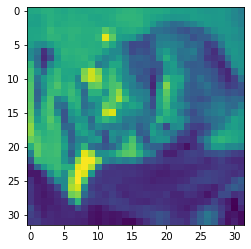

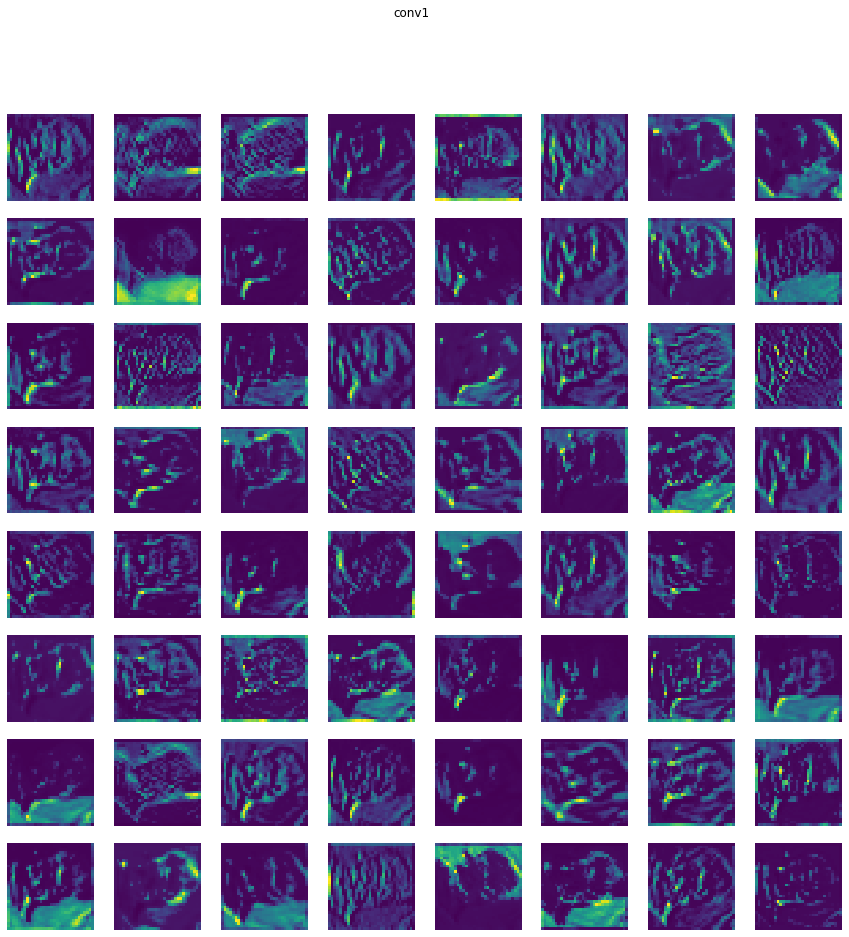

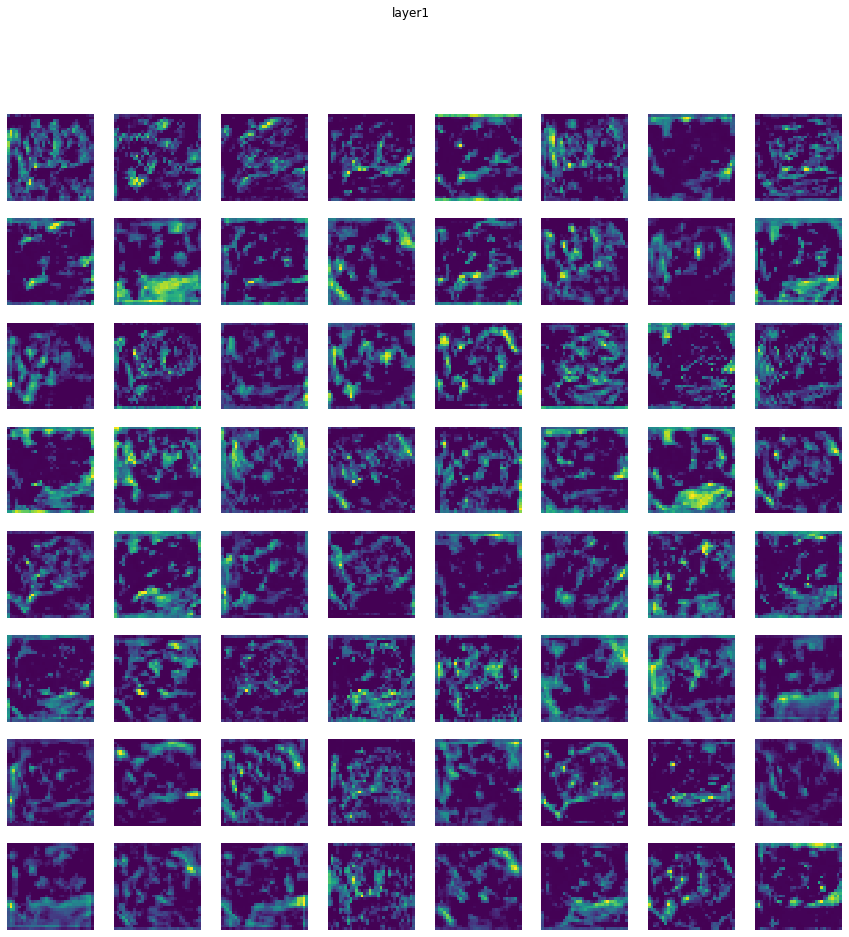

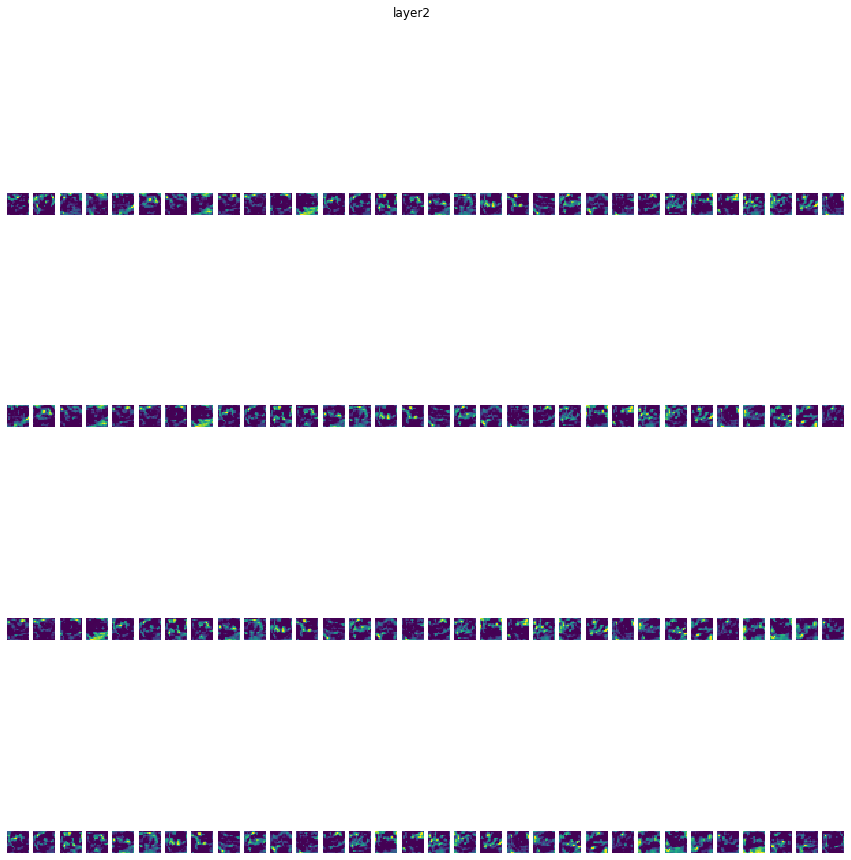

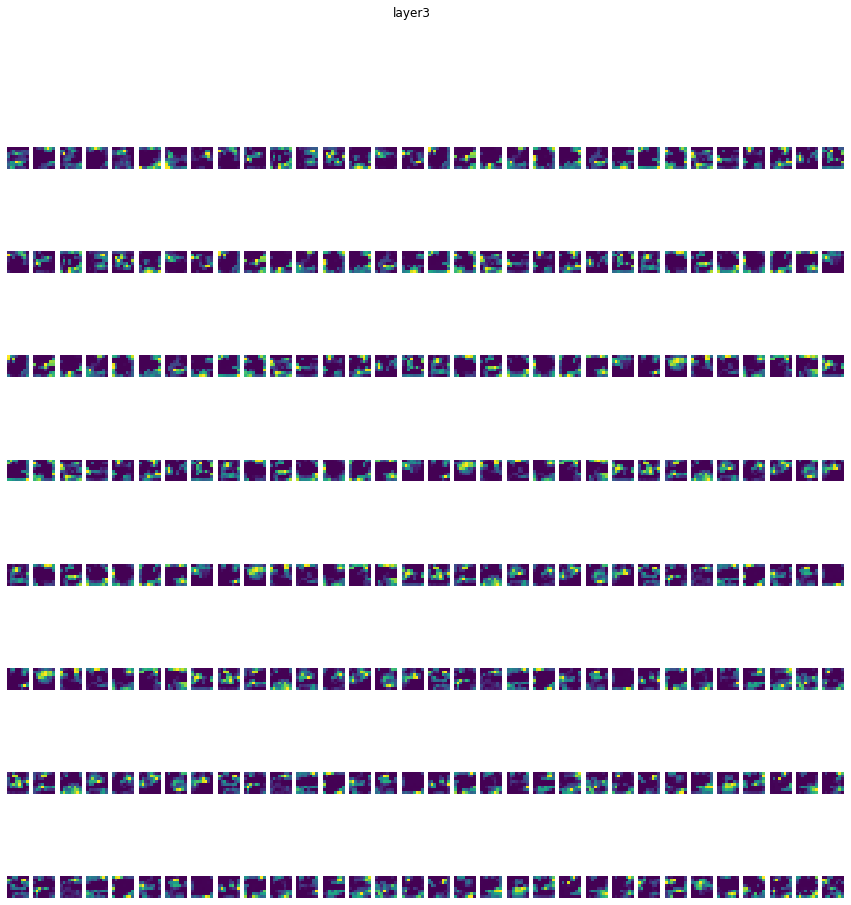

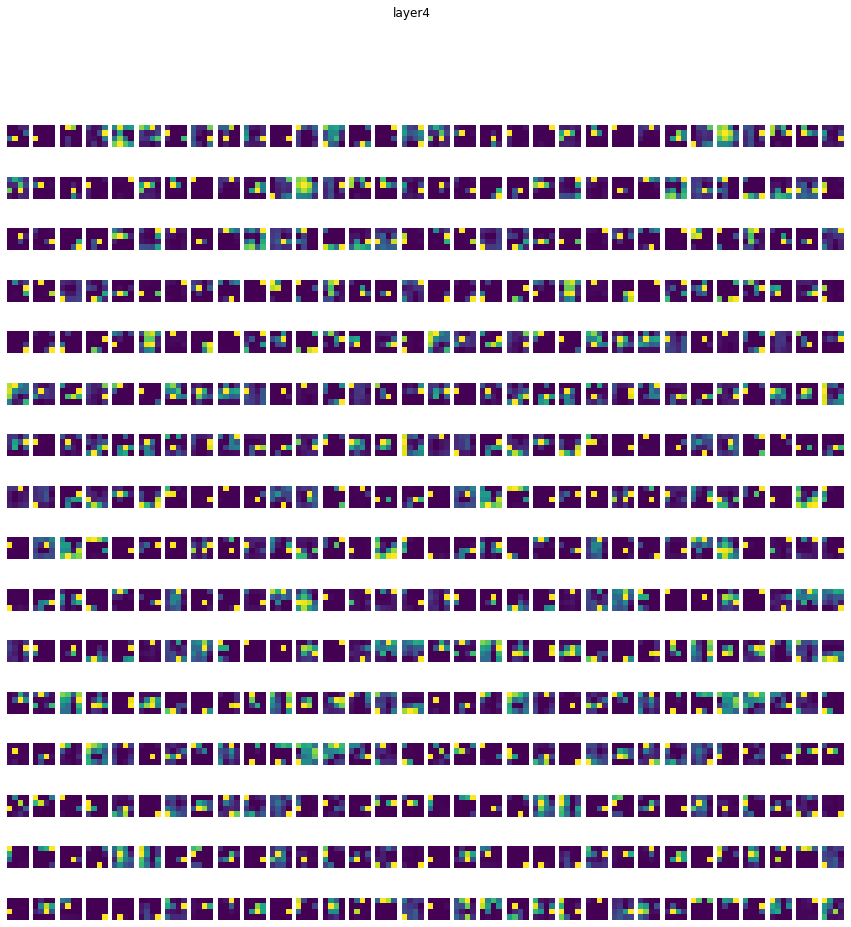

In [ ]:
import matplotlib.pyplot as plt

plt.tight_layout()


activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4']

for l in vis_labels:

    getattr(model, l).register_forward_hook(get_activation(l))
    
    
# data, _ = cifar10_test[0]
data, _ = test_dat[0]
plt.imshow(data[0])
data = data.unsqueeze_(0).to(device = device, dtype = dtype)

output = model(data)

for idx, l in enumerate(vis_labels):

    act = activation[l].squeeze()

    if idx < 2:
        ncols = 8
    else:
        ncols = 32
        
    nrows = act.size(0) // ncols
    
    fig, axarr = plt.subplots(nrows, ncols, figsize=(15,15))
    fig.suptitle(l)


    for i in range(nrows):
        for j in range(ncols):
            axarr[i, j].imshow(act[i * nrows + j].cpu())
            axarr[i, j].axis('off')